In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-compression/mg.png
/kaggle/input/bird-image/bird_small.png
/kaggle/input/snake-image/snake.png
/kaggle/input/dragon-file/snake.png


# A note on image representation


A straightforward 24-bit color representation of an image means that each pixel in the image is represented using three 8-bit unsigned integers, one for each color channel: red, green, and blue (RGB).

In this representation:

Each of the three color channels (red, green, and blue) has 8 bits of information, allowing for 256 possible intensity levels for each channel.
Combining the intensity levels of the three color channels creates a wide range of colors. The total number of colors that can be represented in this system is 256 * 256 * 256 = 16,777,216 colors.
The order of the three color channels is typically specified as RGB, where the first 8 bits represent the intensity of red, the next 8 bits represent the intensity of green, and the last 8 bits represent the intensity of blue.


# Objective of our code

Here we are using a 1024 x 1024 pixel png coloured image. The image will have three colour channels in every pixel. Each pixel can represent upto 256 * 256 * 256 = 16,777,216 colors.

By image compression we aims to reduce the number of colour of each pixel to 16. By making this reduction it is possible to represent(compress) the image in an efficient way
We use the k-means algorithm to select the 16 colours. 


We will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
Once we have computed the cluster centroids on the image, we will then use the 16 colors to replace the pixels in the original image.


image source- midjourney

**Image Visualisation**

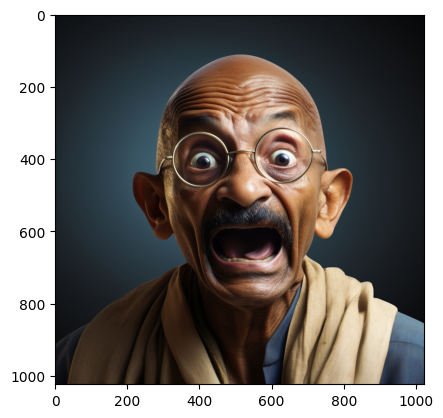

The shape of the image matrix is (1024, 1024, 3)


In [118]:
original_img1 = plt.imread('/kaggle/input/bird-image/bird_small.png')
original_img2 = plt.imread('/kaggle/input/dragon-file/snake.png')
original_img3 = plt.imread('/kaggle/input/image-compression/mg.png')
original_img4 = plt.imread('/kaggle/input/snake-image/snake.png')
original_img = original_img3
clusters= 8

plt.imshow(original_img)  # to display the image uploaded
plt.show()
print(f'The shape of the image matrix is {original_img.shape}')  # to get the shape of the image

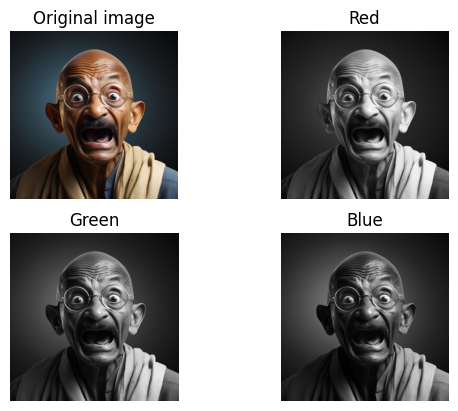

In [119]:

r=original_img[:,:,0]
g=original_img[:,:,1]
b=original_img[:,:,2]
output=[original_img,r,g,b]
title=['Original image','Red','Green', 'Blue']

for i in range(len(title)):
    plt.subplot(2,2,i+1)
    plt.title(title[i])
    plt.axis('off')
    if i==0:
        plt.imshow(output[i])
    else:
        plt.imshow(output[i],cmap='gray')
plt.show()

# Converting image to a matrix

* original_img: This is the original image array, represented as a three-dimensional NumPy array with shape (height, width, 3), where the last dimension represents the color channels (e.g., Red, Green, Blue).

* (original_img.shape[0] * original_img.shape[1], 3): This tuple specifies the shape of the reshaped array. The first dimension is calculated as the total number of pixels in the original image (height times width), and the second dimension is set to 3, representing the three color channels (RGB).

In [120]:
img_array=np.reshape(original_img,(original_img.shape[0]*original_img.shape[1],3))
img_array.shape



(1048576, 3)

# Implementing KMeans algorithm

In [121]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=clusters,random_state=0,n_init=10)

kmeans.fit(img_array)
kmeans.cluster_centers_

array([[0.89876294, 0.8189285 , 0.7175765 ],
       [0.12671131, 0.16246332, 0.18613346],
       [0.6262156 , 0.48974657, 0.3845411 ],
       [0.1988441 , 0.27449185, 0.32378754],
       [0.47661048, 0.31723958, 0.21534707],
       [0.08601518, 0.07394949, 0.07272732],
       [0.7863939 , 0.64807093, 0.52400875],
       [0.24335112, 0.15527932, 0.10567937]], dtype=float32)

# Display the colors of the image and mark the centroids

This code will create a 3D scatter plot with each point representing the color of a pixel in the image, where the color of the point is determined by the RGB values of the corresponding pixel. The size of each point is fixed at 0.01, and depth shading is enabled

/tmp/ipykernel_33/3161933546.py:10: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0., 0., 0., .2))


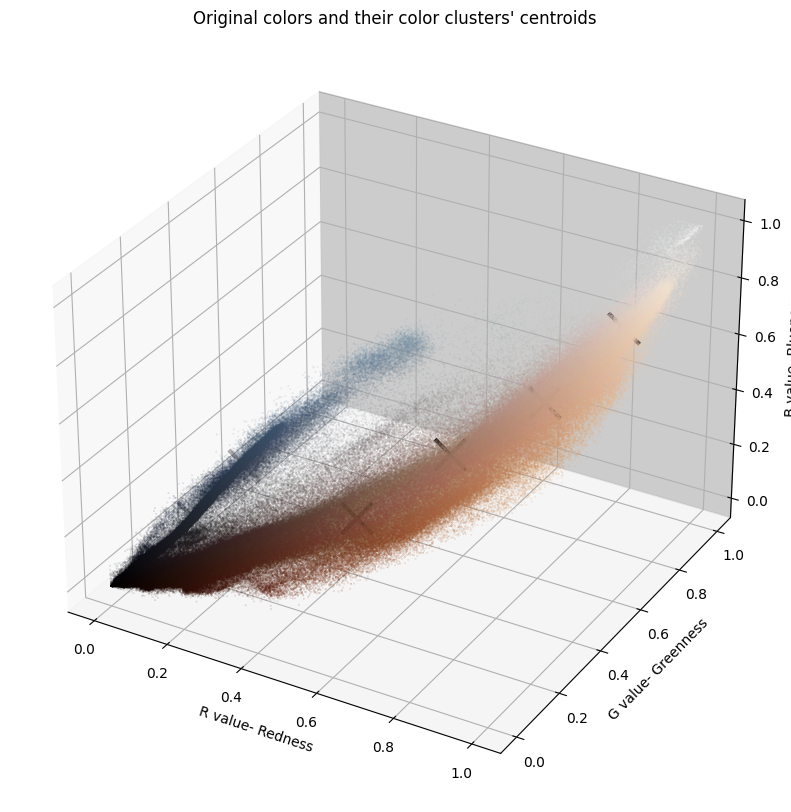

In [122]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img_array[:, 0], img_array[:, 1], img_array[:, 2], c=img_array, s=0.01, depthshade=True)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           c='black', marker='x', s=500, linewidths=3)

ax.set_xlabel('R value- Redness')
ax.set_ylabel('G value- Greenness')
ax.set_zlabel('B value- Blueness')
ax.w_yaxis.set_pane_color((0., 0., 0., .2))
ax.set_title("Original colors and their color clusters' centroids")
plt.show()

# Visualising the colour of each centroid

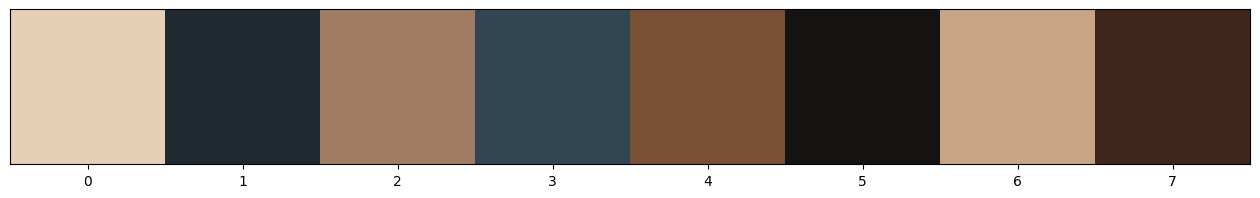

In [123]:
# Visualize the 16 colors selected
palette = np.expand_dims(kmeans.cluster_centers_, axis=0)
num = np.arange(0,len(kmeans.cluster_centers_))
plt.figure(figsize=(16, 16))
plt.xticks(num)
plt.yticks([])
plt.imshow(palette)
plt.show()

# Image Compression

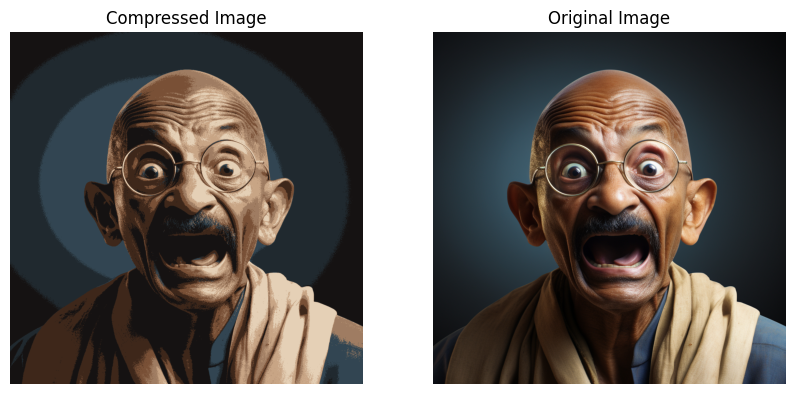

In [126]:
#kmeans.cluster_centers_
# RGB values of each pixel is made to the nearest centroid pixel values 
compressed_image_array=kmeans.cluster_centers_[kmeans.labels_]



# Reshape image into proper dimensions
image_recovered = np.reshape(compressed_image_array, original_img.shape) 

#displaying the compressed and original image side by side
plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(image_recovered)
plt.title("Compressed Image")
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(original_img)
plt.title("Original Image")

plt.show()